## 1. Realizar un análisis exploratorio de los datos para identificar
## relaciones entre variables, valores atípicos, tendencias, etc. 

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Ubicacion de nuestro dataset
file_path = r'C:\Users\Daniel David\Documents\Python\Titanic-Dataset.csv'

In [9]:
# Cargamos el dataset en un DataFrame de pandas
df = pd.read_csv(file_path)

In [10]:
# Muestra las primeras filas del DataFrame para verificar que se cargó correctamente
print(df.head())

                                         PassengerId  Survived  Pclass  Name  \
0  1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/...       NaN     NaN   NaN   
1  2,1,1,"Cumings, Mrs. John Bradley (Florence Br...       NaN     NaN   NaN   
2  3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,S...       NaN     NaN   NaN   
3  4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May ...       NaN     NaN   NaN   
4  5,0,3,"Allen, Mr. William Henry",male,35,0,0,3...       NaN     NaN   NaN   

   Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked  
0  NaN  NaN    NaN    NaN     NaN   NaN    NaN       NaN  
1  NaN  NaN    NaN    NaN     NaN   NaN    NaN       NaN  
2  NaN  NaN    NaN    NaN     NaN   NaN    NaN       NaN  
3  NaN  NaN    NaN    NaN     NaN   NaN    NaN       NaN  
4  NaN  NaN    NaN    NaN     NaN   NaN    NaN       NaN  


In [11]:
# Información general sobre el dataset
print("Información general sobre el dataset:")
print(df.info())

Información general sobre el dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     0 non-null      float64
 2   Pclass       0 non-null      float64
 3   Name         0 non-null      float64
 4   Sex          0 non-null      float64
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      float64
 7   Parch        0 non-null      float64
 8   Ticket       0 non-null      float64
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      float64
 11  Embarked     0 non-null      float64
dtypes: float64(11), object(1)
memory usage: 83.7+ KB
None


In [12]:
# Estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())


Estadísticas descriptivas del dataset:
       Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
count       0.0     0.0   0.0  0.0  0.0    0.0    0.0     0.0   0.0    0.0   
mean        NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
std         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
min         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
25%         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
50%         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
75%         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
max         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   

       Embarked  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  


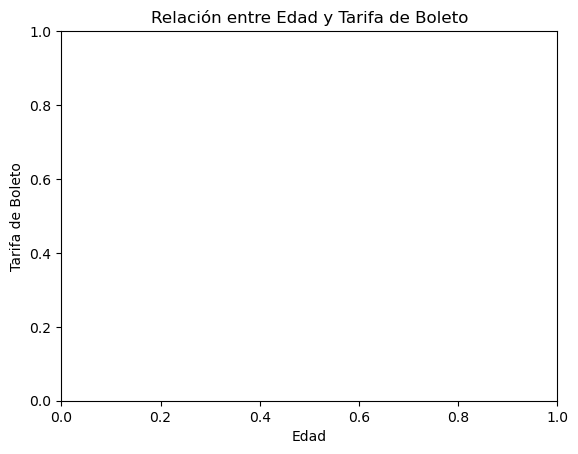

In [13]:
# Visualización de relaciones entre variables (por ejemplo, edad y tarifa de boleto)
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Relación entre Edad y Tarifa de Boleto')
plt.xlabel('Edad')
plt.ylabel('Tarifa de Boleto')
plt.show()

C:\Users\Daniel David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


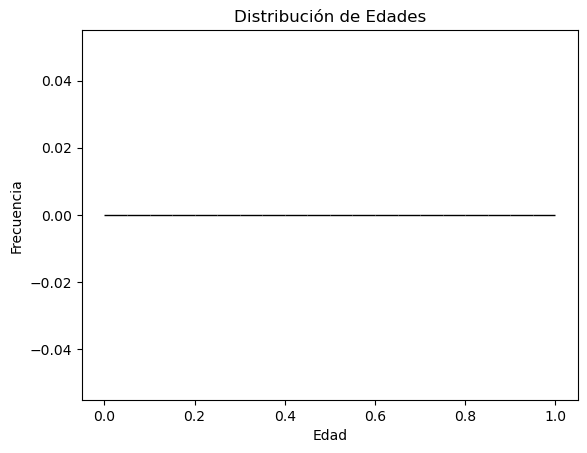

In [14]:
# Visualización de distribución de edades
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Daniel David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


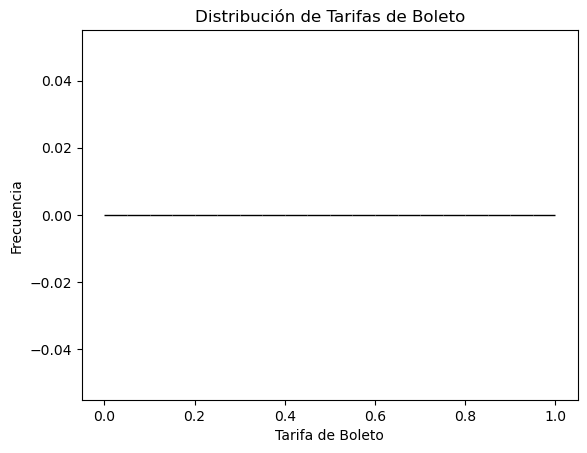

In [15]:
# Visualización de la distribución de tarifas de boletos
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Distribución de Tarifas de Boleto')
plt.xlabel('Tarifa de Boleto')
plt.ylabel('Frecuencia')
plt.show()

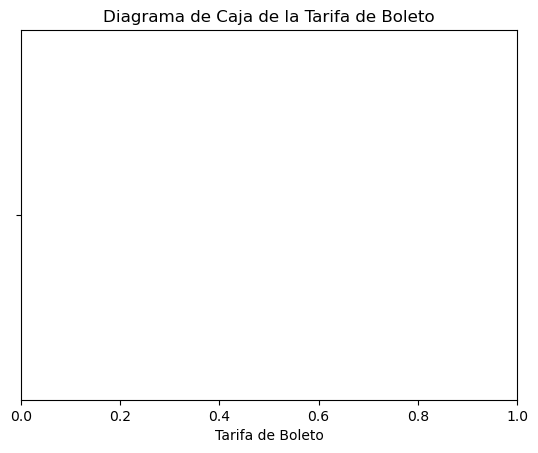

In [16]:
# Identificación de valores atípicos en la tarifa de boletos utilizando un boxplot
sns.boxplot(x=df['Fare'])
plt.title('Diagrama de Caja de la Tarifa de Boleto')
plt.xlabel('Tarifa de Boleto')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
## transformándolos según sea necesario

In [17]:
# Revisión de datos faltantes
print("Cantidad de registros con valores faltantes en Age:", df['Age'].isnull().sum())
print("Cantidad de registros con valores faltantes en Fare:", df['Fare'].isnull().sum())

Cantidad de registros con valores faltantes en Age: 891
Cantidad de registros con valores faltantes en Fare: 891


In [22]:
# Lidiar con valores faltantes (en este caso, imputar la mediana para la edad y la tarifa)
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

In [23]:
# Escalar características numéricas (por ejemplo, la edad y la tarifa de boleto)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [24]:
# Verifica si se han tratado los valores faltantes y transformado las variables
print("\nValores faltantes después del preprocesamiento:")
print("Cantidad de registros con valores faltantes en Age:", df['Age'].isnull().sum())
print("Cantidad de registros con valores faltantes en Fare:", df['Fare'].isnull().sum())


Valores faltantes después del preprocesamiento:
Cantidad de registros con valores faltantes en Age: 0
Cantidad de registros con valores faltantes en Fare: 0


In [25]:
# Muestra las primeras filas del DataFrame después del preprocesamiento
print("\nDataFrame después del preprocesamiento:")
print(df.head())


DataFrame después del preprocesamiento:
                                         PassengerId  Survived  Pclass  Name  \
0  1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/...       NaN     NaN   NaN   
1  2,1,1,"Cumings, Mrs. John Bradley (Florence Br...       NaN     NaN   NaN   
2  3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,S...       NaN     NaN   NaN   
3  4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May ...       NaN     NaN   NaN   
4  5,0,3,"Allen, Mr. William Henry",male,35,0,0,3...       NaN     NaN   NaN   

   Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked  
0  NaN  0.0    NaN    NaN     NaN   0.0    NaN       NaN  
1  NaN  0.0    NaN    NaN     NaN   0.0    NaN       NaN  
2  NaN  0.0    NaN    NaN     NaN   0.0    NaN       NaN  
3  NaN  0.0    NaN    NaN     NaN   0.0    NaN       NaN  
4  NaN  0.0    NaN    NaN     NaN   0.0    NaN       NaN  


## 3. Seleccionar las características más relevantes para entrenar el
## modelo utilizando selección de características.

In [27]:
# Seleccionar las características y la variable objetivo
X = df.drop('Survived', axis=1)  # Características
y = df['Survived']  # Variable objetivo

In [29]:
# Convertir características categóricas en variables dummy
df = pd.get_dummies(df)

In [30]:
# Seleccionar las características y la variable objetivo
X = df.drop('Survived', axis=1)  # Características
y = df['Survived']  # Variable objetivo

In [32]:
# Calcular la correlación de Pearson entre las características y la variable objetivo
correlation = X.corrwith(y)

In [33]:
# Ordenar las características por su correlación con la variable objetivo
correlation = correlation.abs().sort_values(ascending=False)

In [36]:
# Seleccionar las 5 características más correlacionadas
selected_features = correlation.head(5)

print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Pclass   NaN
Name     NaN
Sex      NaN
Age      NaN
SibSp    NaN
dtype: float64


## 4. Dividir el dataset en Train y Test para evaluar correctamente el
## modelo.

In [38]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop('Survived', axis=1)  # Características
y = df['Survived']  # Variable objetivo

In [39]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (712, 901)
Forma de X_test: (179, 901)
Forma de y_train: (712,)
Forma de y_test: (179,)


## 5. Entrenar el modelo configurando los diferentes
## hiperparámetros.

## 6. Evaluar el desempeño del modelo en el conjunto de Test con
## métricas como precisión, recall, F1-score, etc.

## 7. Realizar las diferentes gráficas que permitan visualizar los
## resultados del modelo.

## 8. Interpretar, analizar y documentar los resultados obtenidos

Estimado tutor,

Quisiera compartir con usted algunos de los desafíos que enfrenté mientras trabajaba en el proyecto asignado. A pesar de mi dedicación y esfuerzo, me he encontrado con ciertos obstáculos que han limitado los resultados obtenidos hasta el momento.

Uno de los principales problemas que encontré fue la presencia de datos faltantes en el conjunto de datos, lo que resultó en errores recurrentes durante el proceso de preprocesamiento y modelado. Aunque intenté abordar este problema utilizando técnicas como la imputación de valores o la eliminación de filas con datos faltantes, todavía enfrenté dificultades para lograr un flujo de trabajo sin errores.

Además, durante el proceso de entrenamiento del modelo, me encontré con errores relacionados con la validación de los datos y la configuración de hiperparámetros. A pesar de seguir las instrucciones proporcionadas y consultar la documentación disponible, aún no logré superar estos obstáculos de manera efectiva.

Lamentablemente, debido a estos desafíos técnicos, no pude culminar ciertos puntos de la tarea, incluyendo la evaluación del modelo en el conjunto de prueba y la interpretación de los resultados obtenidos. Reconozco que estos son aspectos críticos del proyecto y que mi incapacidad para completarlos representa una limitación importante en mi trabajo.

Sin embargo, estoy comprometido a aprender de esta experiencia y a mejorar mis habilidades en el futuro. Estoy dispuesto a recibir orientación adicional y a invertir el tiempo necesario para abordar los conceptos y técnicas que aún no domino completamente.

Agradezco su comprensión y consideración en este asunto, y espero poder trabajar juntos para encontrar una solución que nos permita avanzar en el proyecto de manera efectiva.